<a href="https://colab.research.google.com/github/fertorresfs/Image-Classification-with-CNNs-using-Keras/blob/master/Image_Classification_with_CNNs_using_Keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarefa 1 - Importar as bibliotecas

In [3]:

import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


TensorFlow version: 2.17.1
Is using GPU? True


# Tarefa 2 - Pré-processamento de dados

In [6]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)

    x = x[indices]
    y = y[indices]

    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)

    x = x[indices]
    y = y[indices]

    y = tf.keras.utils.to_categorical(y)

    return x, y

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test   = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Tarefa 3 - Visualizando os exemplos

In [8]:
class_names = ['aeroplane', 'car', 'bird']


In [9]:
def Show_random_examples(x, y, p):
  indices = np.random.choice(range(x.shape[0]),
                             10,
                             replace = False)

  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize = (10, 5))
  for i in range(10):
    plt.subplot(2, 5, 1 + i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
  plt.show()

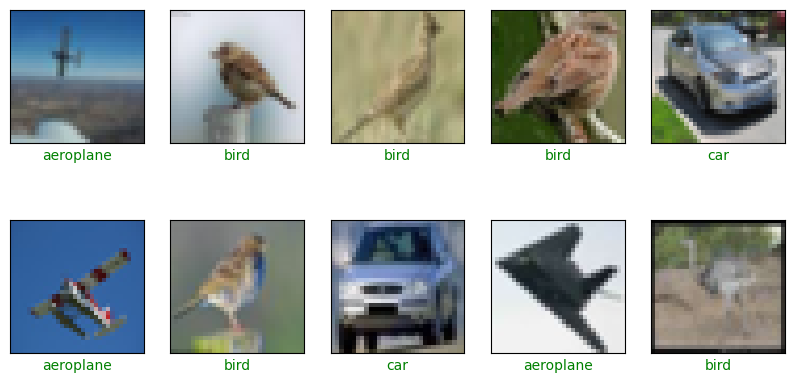

In [10]:
Show_random_examples(x_train, y_train, y_train)

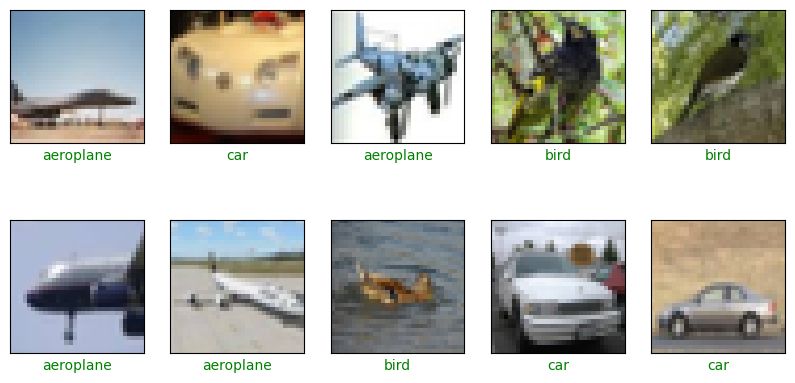

In [11]:
Show_random_examples(x_test, y_test, y_test)

# Tarefa 4 - Criando o modelo

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [13]:
def Create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters,
                         3,
                         activation = 'relu',
                         padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,
                         3,
                         activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.5))
        return model

    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32, 32, 3)))

    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)

    model.add(Flatten())
    model.add(Dense(3, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics=['accuracy'])
    return model

In [14]:
model = Create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289,443 (1.10 MB)

 Trainable params: 288,995 (1.10 MB)

 Non-trainable params: 448 (1.75 KB)

# Tarefa 5 - Treinando o modelo

In [18]:
h = model.fit(x_train/255.,
              y_train,
              validation_data = (x_test/255., y_test),
              epochs = 10,
              batch_size = 128,
              callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2),
                         tf.keras.callbacks.ModelCheckpoint('/content/models/model_{val_accuracy:.3f}.keras',
                                                            save_best_only = True,
                                                            save_weights_only = False,
                                                            monitor = 'val_accuracy')
                         ]
              )


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.5902 - loss: 1.2687 - val_accuracy: 0.3333 - val_loss: 3.2668
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7728 - loss: 0.5702 - val_accuracy: 0.5383 - val_loss: 2.5061
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7879 - loss: 0.5180 - val_accuracy: 0.4967 - val_loss: 1.8634
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8244 - loss: 0.4568 - val_accuracy: 0.5973 - val_loss: 1.1207
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8382 - loss: 0.4201 - val_accuracy: 0.7173 - val_loss: 0.7080
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8490 - loss: 0.3897 - val_accuracy: 0.8693 - val_loss: 0.3245
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8545 - loss: 0.3650 - val_accuracy: 0.8220 - val_loss: 0.5056
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8644 - loss: 0.3366 - val_acc

# Tarefa 6 - Predições finais

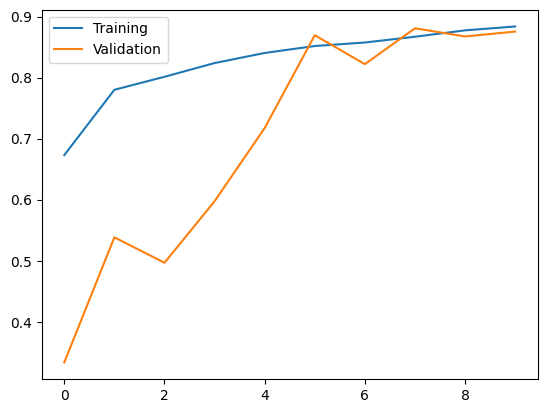

In [19]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label = 'Validation')
plt.legend()
plt.show()

In [20]:
model = tf.keras.models.load_model('/content/models/model_0.881.keras')

In [21]:

preds = model.predict(x_test/255.)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


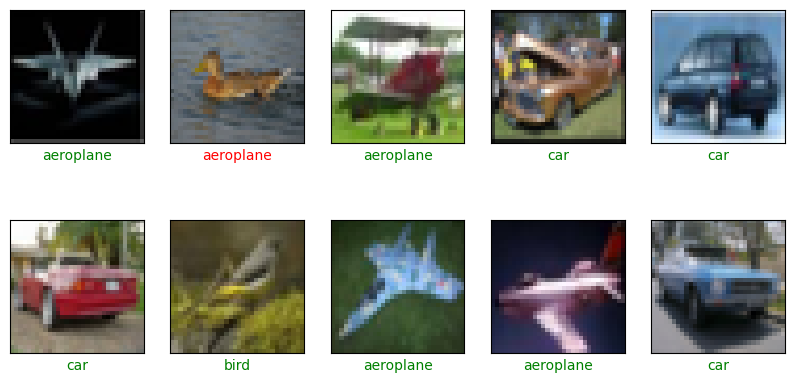

In [22]:
Show_random_examples(x_test, y_test, preds)